### 1. Import Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import listdir
#import utils
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model, model_from_json
from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf

print("Tensorflow Version :",tf.__version__)

Tensorflow Version : 2.6.1


### 2. Plot Sample Images

In [6]:
for expression in os.listdir("data/all/train/"):
    print(expression+":",str(len(os.listdir("data/all/train/"+expression))))

surprise: 3665
disgust: 760
anger: 4347
neutral: 12595
happiness: 13037
fear: 4202
sadness: 5180


### 3. Generating Train and Validation Batches

In [3]:
HEIGHT, WIDTH =48,48
batch_size = 32

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                   rotation_range = 40,
                                  brightness_range=(0.,2.))
train_generator = datagen_train.flow_from_directory("data/all/train/",
                                                   target_size = (HEIGHT, WIDTH),
                                                       color_mode = 'grayscale',
                                                        batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                   rotation_range = 40,
                                  brightness_range=(0.,2.))
validation_generator = datagen_validation.flow_from_directory("data/all/test/",
                                                   target_size = (HEIGHT, WIDTH),
                                                       color_mode = 'grayscale',
                                                        batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

Found 43786 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### 4. Define Model

In [62]:
model = Sequential()
# 1-conv
model.add(Conv2D(64,(3,3),padding='same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2-conv
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3-conv
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 4-conv
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7,activation='softmax'))

opt = Adam(lr=0.0005)

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
#model.summary()


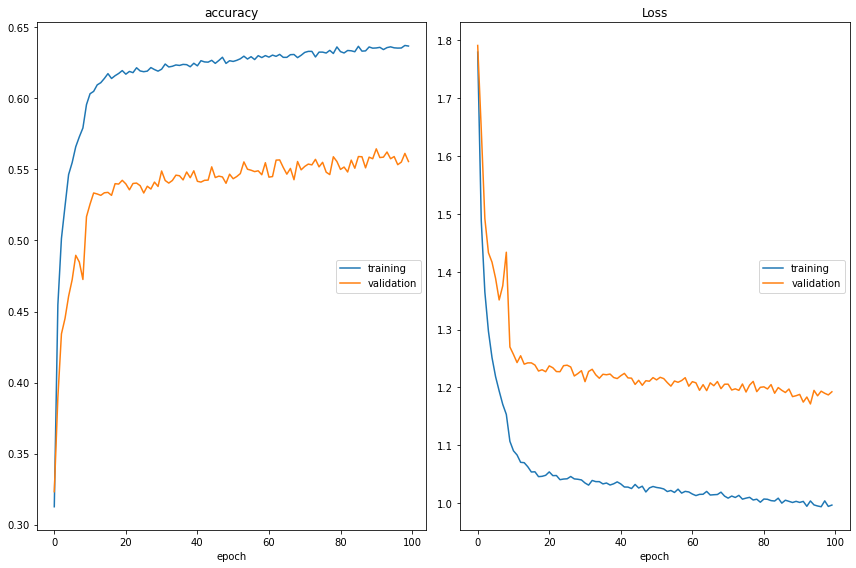

accuracy
	training         	 (min:    0.313, max:    0.637, cur:    0.637)
	validation       	 (min:    0.323, max:    0.565, cur:    0.556)
Loss
	training         	 (min:    0.994, max:    1.780, cur:    0.996)
	validation       	 (min:    1.171, max:    1.791, cur:    1.192)

Epoch 00100: saving model to model_v3_p3.h5


In [63]:
try:
    epochs = 100
    steps_per_epoch = train_generator.n//train_generator.batch_size
    validation_steps = validation_generator.n//validation_generator.batch_size

    checkpoint = ModelCheckpoint("model_v3_p3.h5",monitor='val_accuracy',
                                save_weights_only=False, model='max',verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

    callbacks = [PlotLossesCallback(),checkpoint,reduce_lr]
    history = model.fit(
        x = train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=callbacks
    )
except:
    print("error")

In [64]:

def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model2=my_model()
#model.summary()

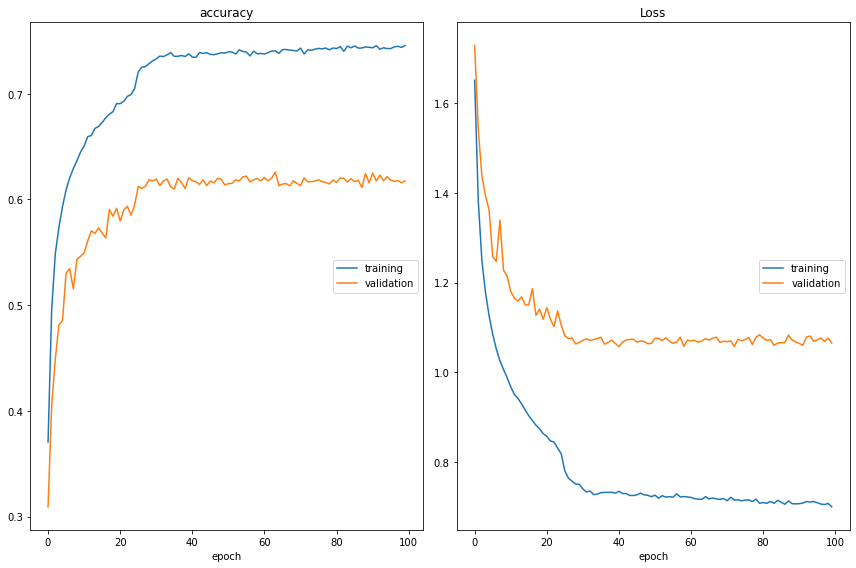

accuracy
	training         	 (min:    0.371, max:    0.746, cur:    0.746)
	validation       	 (min:    0.309, max:    0.626, cur:    0.618)
Loss
	training         	 (min:    0.700, max:    1.652, cur:    0.700)
	validation       	 (min:    1.057, max:    1.729, cur:    1.065)

Epoch 00100: saving model to model_v3_v2_p4.h5


In [65]:
epochs = 100
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_v3_v2_p4.h5",monitor='val_accuracy',
                            save_weights_only=False, model='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [PlotLossesCallback(),checkpoint,reduce_lr]
history = model2.fit(
    x = train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)